# Australian Marsupials Project

## Data Gathering

In [12]:
## Import necessary libraries. Im using IUCN red list API so i need requests and i need galah to get info from Galah Python
import pandas as pd
import numpy as np
import requests
import galah
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import time

In [13]:
# get data
# Taxonomy.csv is a data i downloaded first and save on CSV. I have filtered it to list Australian Marsupials
marsupials_dataframe = pd.read_csv('taxonomy.csv')
marsupials_dataframe.head(10)

,internalTaxonId,scientificName,kingdomName,phylumName,className,orderName,familyName,genusName,speciesName,infraType,infraName,infraAuthority,subpopulationName,authority,taxonomicNotes
0,3339,Burramys parvus,ANIMALIA,CHORDATA,MAMMALIA,DIPROTODONTIA,BURRAMYIDAE,Burramys,parvus,NaN,NaN,NaN,NaN,"Broom, 1896",NaN
1,40540,Sarcophilus harrisii,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Sarcophilus,harrisii,NaN,NaN,NaN,NaN,"(Boitard, 1841)",<em>Sarcophilus laniarius</em> has also been u...
2,40527,Dasykaluta rosamondae,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Dasykaluta,rosamondae,NaN,NaN,NaN,NaN,"(Ride, 1964)",NaN
3,1581,Antechinomys laniger,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Antechinomys,laniger,NaN,NaN,NaN,NaN,"(Gould, 1856)",<p>Two subspecies or ‘forms’ (originally descr...
4,40531,Ningaui yvonneae,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,yvonneae,NaN,NaN,NaN,NaN,"Kitchener, Stoddart &amp; Henry, 1983",NaN
5,40529,Ningaui ridei,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,ridei,NaN,NaN,NaN,NaN,"Archer, 1975",NaN
6,40530,Ningaui timealeyi,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,timealeyi,NaN,NaN,NaN,NaN,"Archer, 1975",NaN
7,6265,Dasyuroides byrnei,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Dasyuroides,byrnei,NaN,NaN,NaN,NaN,"Spencer, 1896",NaN
8,16888,Phascogale calura,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Phascogale,calura,NaN,NaN,NaN,NaN,"Gould, 1844",NaN
9,16889,Phascogale pirata,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Phascogale,pirata,NaN,NaN,NaN,NaN,"(Thomas, 1904)",<em>Phascogale pirata</em> is considered a sub...


The data shows the scientific name, there are useless field such as infra name, infra authority, infratype, etc. I will delete that for sake of memory

In [14]:
msp_df = marsupials_dataframe.drop([i for i in marsupials_dataframe.columns[-6:]],axis=1) 
msp_df.head(10)

,internalTaxonId,scientificName,kingdomName,phylumName,className,orderName,familyName,genusName,speciesName
0,3339,Burramys parvus,ANIMALIA,CHORDATA,MAMMALIA,DIPROTODONTIA,BURRAMYIDAE,Burramys,parvus
1,40540,Sarcophilus harrisii,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Sarcophilus,harrisii
2,40527,Dasykaluta rosamondae,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Dasykaluta,rosamondae
3,1581,Antechinomys laniger,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Antechinomys,laniger
4,40531,Ningaui yvonneae,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,yvonneae
5,40529,Ningaui ridei,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,ridei
6,40530,Ningaui timealeyi,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,timealeyi
7,6265,Dasyuroides byrnei,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Dasyuroides,byrnei
8,16888,Phascogale calura,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Phascogale,calura
9,16889,Phascogale pirata,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Phascogale,pirata


In [15]:
# Now i will use my API key (Get your own by logging in into IUCN red list)
load_dotenv()
secret_key = os.getenv('API_KEY')

# Using requests for API

# simple EDA

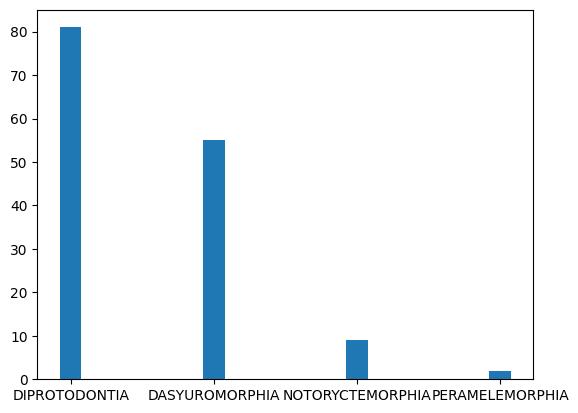

In [16]:
# We dont need to check kingdom since its all animals. Lets see the order and family
msp_df['orderName'].unique()

# output : array(['DIPROTODONTIA', 'DASYUROMORPHIA', 'NOTORYCTEMORPHIA','PERAMELEMORPHIA'], dtype=object)
# We see there are 4 orders of marsupials in Australia

msp_df['orderName'].value_counts()
# orderName DIPROTODONTIA       81, DASYUROMORPHIA      55, PERAMELEMORPHIA      9, NOTORYCTEMORPHIA     2

# Create a matplotlib graph 
x = np.array(msp_df['orderName'].unique())
y = np.array(msp_df['orderName'].value_counts())

graph = plt.bar(x,y,width=0.15)


We can see that almost 50% of Marsupials are Diprotodontia, they have characteristic such as 2 front teeth and some species have syndactyly (fused toes). The animals are koala, wallaby, and kangoroo.

The smallest order name of marsupials are peramelemorphia. They are usually small mammals, basically rats but marsupial. The common animals are bandicoots 

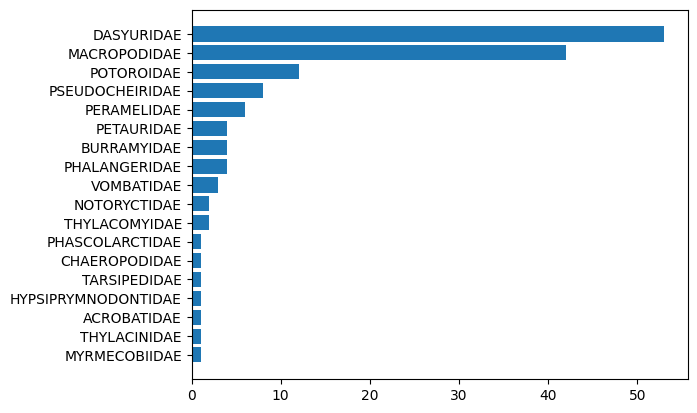

In [17]:
names = msp_df['familyName'].unique()
counts = msp_df['familyName'].value_counts().reset_index()
counts = counts.sort_values('count')

x = counts['familyName']
y = counts['count']

graph = plt.barh(x,y)

Most marsupials in Australia belong in the Dasyuridae family

In [31]:
# Get the api key to use API for get json data to turn into a dataframe
# First we split the names first
name_list = marsupials_dataframe['scientificName'].to_list()
name_list = [each.split(' ') for each in name_list]
json_list = []
headers = {
    'accept' : 'application/json',
    'Authorization' :secret_key
}

# Created a for loops
for i in range(len(name_list)-1):
    url = f'https://api.iucnredlist.org/api/v4/taxa/scientific_name?genus_name={name_list[i][0]}&species_name={name_list[i][1].capitalize()}'
    dicts = requests.get(url,headers=headers)
    json_list.append(dicts.json())

print(json_list)

[{'taxon': {'sis_id': 3339, 'scientific_name': 'Burramys parvus', 'species_taxa': [], 'subpopulation_taxa': [], 'infrarank_taxa': [], 'kingdom_name': 'ANIMALIA', 'phylum_name': 'CHORDATA', 'class_name': 'MAMMALIA', 'order_name': 'DIPROTODONTIA', 'family_name': 'BURRAMYIDAE', 'genus_name': 'Burramys', 'species_name': 'parvus', 'subpopulation_name': None, 'infra_name': None, 'authority': 'Broom, 1896', 'species': True, 'subpopulation': False, 'infrarank': False, 'ssc_groups': [{'name': 'IUCN SSC Australasian Marsupial and Monotreme Specialist Group', 'url': 'https://www.iucn.org/commissions/ssc-groups/mammals/specialist-groups-a-e/australasian-marsupial-and-monotreme', 'description': 'Co-Chairs: John Woinarski (email: John.Woinarski@cdu.edu.au) and Diana Fisher (email: d.fisher@uq.edu.au)\nRed List Authority Coordinator: Chris Johnson (email: c.n.johnson@utas.edu.au)'}], 'common_names': [{'main': False, 'name': "Broom's Pygmy-possum", 'language': 'eng'}, {'main': False, 'name': 'Burramys

In [48]:
# First lets check one of the keys
type(json_list[0]) # Output dict
json_list[0].keys() # Output (['taxon', 'assessments', 'params'])

# We only wanna see assessments
json_list[0]['assessments']

# we have multiple assessments for one species. Now we can just find the latest
assessment_list = []
for item in json_list:
    assessment_list.append(item['assessments'][0])
    
print(assessment_list)

[{'year_published': '2008', 'latest': True, 'possibly_extinct': False, 'possibly_extinct_in_the_wild': False, 'sis_taxon_id': 3339, 'url': 'https://www.iucnredlist.org/species/3339/9775825', 'assessment_id': 9775825, 'scopes': [{'description': {'en': 'Global'}, 'code': '1'}]}, {'year_published': '2008', 'latest': True, 'possibly_extinct': False, 'possibly_extinct_in_the_wild': False, 'sis_taxon_id': 40540, 'url': 'https://www.iucnredlist.org/species/40540/10331066', 'assessment_id': 10331066, 'scopes': [{'description': {'en': 'Global'}, 'code': '1'}]}, {'year_published': '2016', 'latest': True, 'possibly_extinct': False, 'possibly_extinct_in_the_wild': False, 'sis_taxon_id': 40527, 'url': 'https://www.iucnredlist.org/species/40527/21943336', 'assessment_id': 21943336, 'scopes': [{'description': {'en': 'Global'}, 'code': '1'}]}, {'year_published': '2016', 'latest': True, 'possibly_extinct': False, 'possibly_extinct_in_the_wild': False, 'sis_taxon_id': 1581, 'url': 'https://www.iucnredli

In [51]:
assessments = pd.DataFrame(assessment_list)
# We have a new dataframe, the assessment ID will be important

In [57]:
# Get the assessment base on the ID
assessment_cont = []

for i in range(len(assessments)-1):
    url = f'https://api.iucnredlist.org/api/v4/assessment/{assessments['assessment_id'][i]}'
    dicts = requests.get(url,headers=headers)
    assessment_cont.append(dicts.json())

We got the assessments. Now we can see the interesting ones, lets observe the structure

Lets establish the questions we want on the EDA
- Order and Family distribution 
- Common threats faced
- Common categories (endangered, etc)
- Distribution of locations
- Population trends

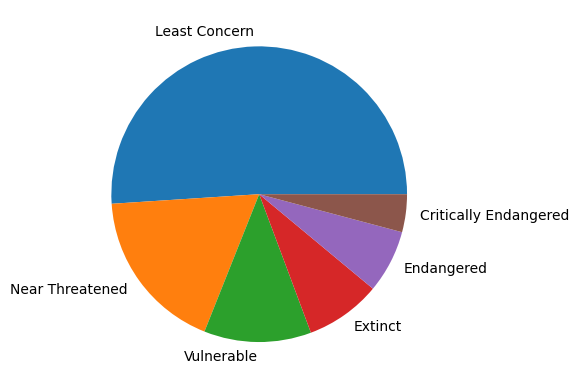

In [80]:
# Lets get the categories
red_list_categories = [each['red_list_category']['description']['en'] for each in assessment_cont]
tmp_df = pd.DataFrame({'category':red_list_categories})
rlc_df = pd.DataFrame(tmp_df.value_counts(normalize=True).reset_index())

slices = rlc_df['proportion']
labels = rlc_df['category']

plt.pie(slices, labels=labels)
plt.show()

Even though majority of Australia marsupials are still safe. There are still extinct individuals and it shares the same proportion with endangered species. This may mean that endangered species have a high risk of extinction. There is also a remarkable proprtion of near threatened and vulnerable animals. 

In [ ]:
# Lets get the locations around Australia
